In [2]:
# Mongo 연결
from pymongo import MongoClient as mc
import random
import pprint as pp

mongo_uri = "mongodb://localhost:27017"
client = mc(mongo_uri)

keti_pr_db = client.keti_pattern_recognition
household_col = keti_pr_db.household_info

total = household_col.count()
db_datas = list(household_col.\
                find().skip(random.randrange(0,total)).limit(1))[0]
# db_datas = household_col.\
#                 find_one({
#                     "uid": "아파트4-103-606"
#                 })

client.close()

# require module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

sns.set(rc={'figure.figsize': (15.7, 13.27)})
plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

# custom module
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import custom.supports as sp
import custom.mapgenerator as mg
import custom.dateutils as du

SEASONS = {
    "봄" : [3, 4, 5],
    "여름" : [6, 7, 8],
    "가을" : [9, 10, 11],
    "겨울" : [12, 1, 2]
}

SEASONSARR = ['봄','여름','가을','겨울']

'''
 0 : 봄
 1 : 여름
 2 : 가을
 3 : 겨울
'''

DAYARR = ["월", "화", "수", "목", "금", "토", "일"]

uid, timeslot = db_datas['uid'], db_datas['timeslot']

print("{} pattern recognition".format(uid))

datelist = [
    dt.strptime(ts['time'], "%Y-%m-%d T%H:%M %z").date()
    for ts in timeslot
]
datelist = list(set(datelist))
datelist.sort()

ts_datas = {}
start_idx = 0
end_idx = 96
enl = 1000

for date in datelist:
    ts_datas[date] = [ ts['power'] * enl for ts in timeslot[start_idx:end_idx]]
    start_idx = end_idx
    end_idx = end_idx + 96

ts_datas = pd.DataFrame(ts_datas).T
datas = ts_datas.reset_index().copy()

datas.rename(columns={"index": "date"}, inplace=True)
datas['date'] = pd.to_datetime(datas['date'])
datas['month'] = [dt.month for dt in datas['date']]
datas = [
    datas[(datas['month'].isin(SEASONS[season]))].copy()
    for season in SEASONSARR
]

bak_datas = datas.copy()

season_datas = {
    "봄": datas[0].copy(),
    "여름": datas[1].copy(),
    "가을": datas[2].copy(),
    "겨울": datas[3].copy()
}

season_datas["봄"]

<ipython-input-2-d6edea75253d>:12: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  total = household_col.count()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
아파트2-2-1301 pattern recognition


,date,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,month
0,2018-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2018-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2018-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,2018-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,2018-05-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-04-26,102.0,107.0,120.0,74.0,71.0,59.0,44.0,53.0,61.0,...,133.0,120.0,137.0,157.0,151.0,125.0,130.0,137.0,101.0,4
361,2019-04-27,109.0,103.0,118.0,98.0,79.0,128.0,79.0,91.0,87.0,...,85.0,82.0,75.0,77.0,66.0,81.0,84.0,68.0,90.0,4
362,2019-04-28,153.0,155.0,99.0,116.0,102.0,74.0,80.0,70.0,53.0,...,149.0,175.0,142.0,138.0,127.0,107.0,77.0,73.0,81.0,4
363,2019-04-29,69.0,68.0,79.0,68.0,65.0,98.0,81.0,110.0,189.0,...,108.0,136.0,141.0,114.0,98.0,99.0,156.0,115.0,74.0,4


In [4]:
# merge timeslot
timeslot = 1
merge_size = timeslot * 4
merge_datas = season_datas["여름"].copy()
merge_datas = merge_datas[
    merge_datas.columns.difference(['month', 'date'])
]
merge_datas.index = season_datas['봄']['date']

tmp = pd.DataFrame()
start_idx = 0
end_idx = 96
for date in merge_datas.index:
    in_arr = []
    og_arr = merge_datas.loc[date].values
    for merging in range(0, int(end_idx / merge_size)):
        in_arr.append(og_arr[
            (merging) * merge_size
            :
            (merging + 1) * merge_size
        ].sum())
#     logging
#     print("date end : {}, size: {}".format(date, len(in_arr)))
    
    tmp[date] = in_arr
merge_datas = tmp.copy()

merge_datas

,2018-05-01,2018-05-02,2018-05-03,2018-05-04,2018-05-05,2018-05-06,2018-05-07,2018-05-08,2018-05-09,2018-05-10,...,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30
0,536.0,376.0,336.0,344.0,496.0,524.0,484.0,556.0,336.0,460.0,...,737.0,546.0,808.0,752.0,577.0,462.0,576.0,497.0,637.0,642.0
1,336.0,248.0,320.0,320.0,340.0,460.0,348.0,320.0,336.0,440.0,...,626.0,459.0,765.0,525.0,467.0,305.0,596.0,458.0,395.0,352.0
2,264.0,248.0,304.0,272.0,288.0,440.0,248.0,260.0,268.0,336.0,...,458.0,420.0,707.0,465.0,313.0,267.0,394.0,395.0,398.0,286.0
3,252.0,248.0,376.0,260.0,280.0,356.0,272.0,260.0,256.0,272.0,...,374.0,397.0,719.0,545.0,250.0,234.0,325.0,373.0,325.0,293.0
4,244.0,296.0,312.0,284.0,280.0,256.0,260.0,256.0,256.0,316.0,...,349.0,450.0,723.0,738.0,311.0,288.0,395.0,342.0,281.0,256.0
5,244.0,256.0,316.0,564.0,264.0,256.0,256.0,252.0,304.0,260.0,...,394.0,447.0,441.0,458.0,316.0,273.0,351.0,387.0,302.0,274.0
6,436.0,252.0,304.0,500.0,380.0,252.0,576.0,444.0,272.0,256.0,...,503.0,456.0,512.0,388.0,289.0,415.0,432.0,592.0,470.0,488.0
7,372.0,280.0,356.0,408.0,472.0,256.0,548.0,504.0,252.0,256.0,...,443.0,508.0,461.0,388.0,332.0,566.0,471.0,614.0,663.0,536.0
8,296.0,624.0,416.0,308.0,380.0,392.0,348.0,308.0,548.0,384.0,...,307.0,394.0,450.0,479.0,348.0,403.0,336.0,310.0,332.0,317.0
9,300.0,424.0,396.0,252.0,312.0,524.0,316.0,296.0,468.0,328.0,...,302.0,379.0,291.0,402.0,363.0,408.0,358.0,323.0,309.0,269.0


In [8]:
from scipy.spatial import distance
import random

def means_run(K=3, sequence=2):
    cluster_dict = {}
    cluster_index = []
    map_datas = []
    row_datas = merge_datas.T.copy()
    prev_ecv = 0
    
    print("------K:{}------".format(K))
    for seqq in range(0, sequence):
#         print("{} Start!".format(seqq))
        # 첫 클러스터 선정
        if seqq == 0:
#             print("첫 클러스터 선정")
            init_k = random.randint(0,len(row_datas.index) - 1)
            init_cluster_index = row_datas.index[init_k]
            init_cluster = row_datas.iloc[init_k].copy()
            cluster_dict[0] = init_cluster.values
            cluster_index.append(init_cluster_index)
        #     print(init_cluster_index,init_cluster)

            for seq in range(1, K):
                dis_arr = ['dis_{}'.format(idx) for idx in range(0,seq)]
                dis_check = pd.DataFrame(columns=dis_arr)
                for date in row_datas.index:
                    if date not in cluster_index:
                        dis_check.loc[date] = [
                            distance.euclidean(
                                cluster_dict[num],
                                row_datas.loc[date].values
                            ) for num in cluster_dict.keys()    
                        ]
                cluster_index.append(dis_check.sort_values(by=dis_arr, ascending=False).index[0])

#                 print(dis_check.sort_values(by=dis_arr, ascending=False).index[0],
#                      dis_check.sort_values(by=dis_arr, ascending=False).iloc[0].values
#                      )
                cluster_dict[seq]\
                    = row_datas.loc[dis_check.sort_values(by=dis_arr, ascending=False).index[0]].values
            # 두번째 부터는 중심점을 찾아서
        else:
            for num in cluster_dict.keys():
                date_arr = map_datas[
                        map_datas['label'] == num
                    ]['date'].unique()
#                 print(row_datas.loc[date_arr].values)
                if len(date_arr) != 0:
                    cluster_dict[num] = row_datas.loc[date_arr].mean().values
                
#         print(cluster_dict)
        
        # distance Check
        cols = [idx for idx in range(0, K)]
        dis_info = pd.DataFrame(columns=cols)
        for date in row_datas.index: 
            dis_info.loc[date] = [
                distance.euclidean(
                    cluster_dict[num],
                    row_datas.loc[date].values
                ) 
                for num in cluster_dict.keys()
            ]
    #         print(row_datas.loc[date].values)

        t_dis_info = dis_info.T.copy()
        labels = [ t_dis_info[date].idxmin() for date in t_dis_info ] 
        
        cluster_info = pd.DataFrame()
        cluster_info['date'] = merge_datas.columns
        cluster_info['label'] = labels
        cluster_info.set_index('date', inplace=True)
        cluster_info

#         print(labels)
        
        map_datas = pd.DataFrame()
        for date in merge_datas:
            tmp = pd.DataFrame()
            tmp['timeslot'] = range(0, 24)
            tmp['data'] = merge_datas[date].values
            tmp['date'] = date
            tmp['label'] = cluster_info.loc[date]['label']

            map_datas = pd.concat([tmp, map_datas])
#         print(map_datas)
        #mean_pattern
        mean_pattern = merge_datas.T.mean()

        # TSS
        TSS = 0
        for date in merge_datas:
            TSS += distance.euclidean(
                mean_pattern,
                merge_datas[date].values
            ) ** 2


        # WSS
        WSS = 0
        for date in merge_datas:
            cluster_number = map_datas[
                    (map_datas['date'] == date)
                ]['label'].values[0]
            pattern = map_datas[
                    (map_datas['date'] == date)
                ]['data'].values
            WSS += distance.euclidean(
                pattern,
                cluster_dict[cluster_number]
            ) ** 2
            
        # ECV
        ECV = (1 - (WSS / TSS)) * 100
        print("TSS: {}, WSS: {}, ECV: {}".format(TSS, WSS, ECV))
        if prev_ecv == ECV:
            break
        else:
            prev_ecv = ECV
            
    return cluster_index,cluster_dict, dis_info, labels, map_datas, ECV

for k in range(2, 90):
    cluster_index,dis_check,dis_info, labels, map_datas, ECV = means_run(K=k, sequence=300)
# cluster_index,dis_check,dis_info, labels, map_datas, ECV = means_run(K=32, sequence=3)

cluster_info = pd.DataFrame()
cluster_info['date'] = merge_datas.columns
cluster_info['label'] = labels
cluster_info.set_index('date', inplace=True)
cluster_info
# index=dis_check.sort_values(by=['dis']).index[0]
# index
# dis_info.T.idxmin()
_map = sns.FacetGrid(map_datas, col="label", col_wrap=10, height=30)    
_map.map(sns.lineplot, "timeslot", "data", "date", lw=0.7)

------K:2------
TSS: 201344759.1521739, WSS: 196332896.0, ECV: 2.489194739052536
TSS: 201344759.1521739, WSS: 149764369.5626291, ECV: 25.61794496501445
TSS: 201344759.1521739, WSS: 142846529.2651593, ECV: 29.053763372505937
TSS: 201344759.1521739, WSS: 140116441.65607005, ECV: 30.409690201982475
TSS: 201344759.1521739, WSS: 136911168.68196186, ECV: 32.001622858985826
TSS: 201344759.1521739, WSS: 135765771.53525317, ECV: 32.570496442550535
TSS: 201344759.1521739, WSS: 132801924.51994374, ECV: 34.04252234865787
TSS: 201344759.1521739, WSS: 131397698.10036165, ECV: 34.7399462227607
TSS: 201344759.1521739, WSS: 131169132.34030282, ECV: 34.853465820202054
TSS: 201344759.1521739, WSS: 131169132.34030282, ECV: 34.853465820202054
------K:3------
TSS: 201344759.1521739, WSS: 187660375.0, ECV: 6.796493839619345
TSS: 201344759.1521739, WSS: 137528070.5866523, ECV: 31.695232016091225
TSS: 201344759.1521739, WSS: 135204165.08847365, ECV: 32.849424212582555
TSS: 201344759.1521739, WSS: 130590709.618

TSS: 201344759.1521739, WSS: 37578364.18640482, ECV: 81.33630875487374
TSS: 201344759.1521739, WSS: 36066383.95873016, ECV: 82.08724969519984
TSS: 201344759.1521739, WSS: 34822771.81687074, ECV: 82.7049027928499
TSS: 201344759.1521739, WSS: 34442381.47826087, ECV: 82.89382766986762
TSS: 201344759.1521739, WSS: 34442381.47826087, ECV: 82.89382766986762
------K:19------
TSS: 201344759.1521739, WSS: 129243418.0, ECV: 35.809892174884276
TSS: 201344759.1521739, WSS: 34127395.71849707, ECV: 83.05026867239987
TSS: 201344759.1521739, WSS: 29277414.585714284, ECV: 85.45906299771787
TSS: 201344759.1521739, WSS: 29277414.585714284, ECV: 85.45906299771787
------K:20------
TSS: 201344759.1521739, WSS: 45140355.0, ECV: 77.58056619398597
TSS: 201344759.1521739, WSS: 31326252.162255827, ECV: 84.44148618808607
TSS: 201344759.1521739, WSS: 30829865.534313727, ECV: 84.68802184664122
TSS: 201344759.1521739, WSS: 30829865.534313727, ECV: 84.68802184664122
------K:21------
TSS: 201344759.1521739, WSS: 10614

TSS: 201344759.1521739, WSS: 12259935.766630957, ECV: 93.91097348733818
TSS: 201344759.1521739, WSS: 12048717.18055556, ECV: 94.01587742770633
TSS: 201344759.1521739, WSS: 11998750.61348498, ECV: 94.04069385068202
TSS: 201344759.1521739, WSS: 11977566.93650794, ECV: 94.05121494746459
TSS: 201344759.1521739, WSS: 11977566.93650794, ECV: 94.05121494746459
------K:39------
TSS: 201344759.1521739, WSS: 14931623.0, ECV: 92.58405182092926
TSS: 201344759.1521739, WSS: 7978323.581704932, ECV: 96.03748137508013
TSS: 201344759.1521739, WSS: 7399716.7382663265, ECV: 96.32485257156671
TSS: 201344759.1521739, WSS: 7259737.217102466, ECV: 96.39437487835696
TSS: 201344759.1521739, WSS: 7181418.582291668, ECV: 96.43327265505629
TSS: 201344759.1521739, WSS: 7160026.866269842, ECV: 96.44389707662647
TSS: 201344759.1521739, WSS: 7160026.866269842, ECV: 96.44389707662647
------K:40------
TSS: 201344759.1521739, WSS: 14699768.0, ECV: 92.69920505410816
TSS: 201344759.1521739, WSS: 7282310.401974291, ECV: 96

KeyboardInterrupt: 

K is 4
---First K Select---
---First K Select---
---First K Select---


<AxesSubplot:>

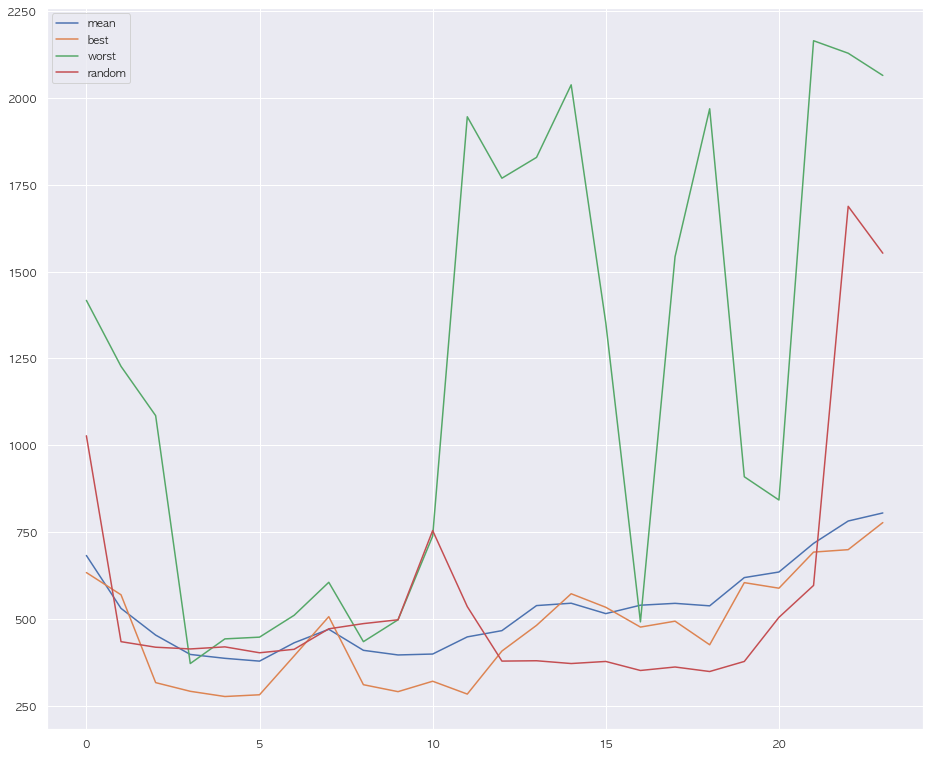

In [84]:
from modules.PatternKMeans import PatternKMeans as PM

kmeans = PM(merge_datas)
kmeans.set_K(4)
mean_pattern = kmeans.mean_pattern
best_cluster = kmeans.run(init_condition="best",ECV=True)
worst_cluster = kmeans.run(ECV=True)
random_cluster = kmeans.run(init_condition="random", ECV=True)

# print(mean_pattern)
# print(best_cluster.values)
sns.lineplot(data=mean_pattern.values, label="mean")
sns.lineplot(data=best_cluster.values, label="best")
sns.lineplot(data=worst_cluster.values, label="worst")
sns.lineplot(data=random_cluster.values, label="random")

K is 4
---First K Select---


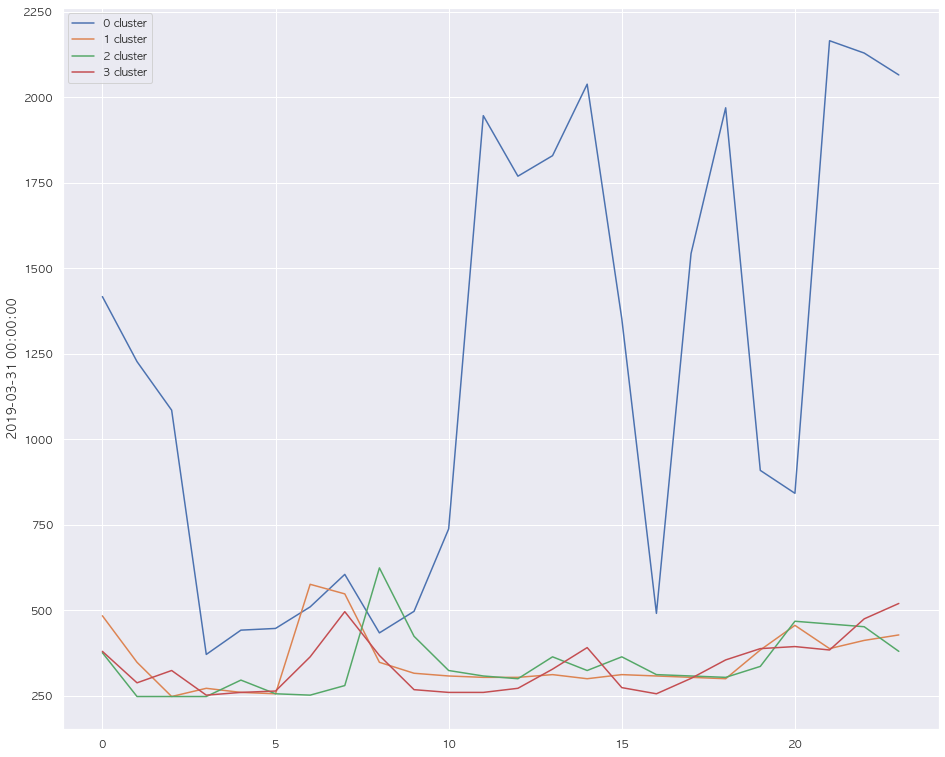

In [118]:
kmeans = PM(merge_datas)
kmeans.set_K(4)
arr, arr_sort, check = kmeans.run(ECV=True)
# print(arr)
# print(arr_sort)
# print(check)

for c in check.keys():
    sns.lineplot(data=check[c], label="{} cluster".format(c))

In [20]:

from numpy import dot
from numpy.linalg import norm
import numpy as np
from scipy.spatial import distance
def cos_sim(A,B):
    return dot(A,B)/(norm(A) * norm(B))

In [159]:
kmeans = PM(merge_datas)
kmeans.set_K(4)
kmeans.run(ECV=True)
# print(arr)
# print(arr_sort)
# print(check)
_map = sns.FacetGrid(kmeans.visual_datas, col="label", col_wrap=3, height=30)    
_map.map(sns.lineplot,
        "timeslot",
        "data",
        "date",
        lw=1)

K is 4
---First K Select---


KeyError: 0

In [ ]:
# row_datas = merge_datas.T.copy()

# dr_datas = kmeans.dimension_reduction()

#     # 가장 유사도 높은 거
# dr_datas.sort_values(['x','y'], ascending=[True, False])
#     # 가장 유사도 낮은 거
# dr_datas.sort_values(['x','y'], ascending=[False, True])